<a href="https://colab.research.google.com/github/vanleiko/bootcamp_alura/blob/main/Vanessa_Leiko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**RESUMO**
___

O objetivo do projeto foi analisar como o número de habitantes do estado de São Paulo variou entre os anos de 1980 e 2019. A dinâmica populacional é influenciada por vários fatores, como natalidade, mortalidade, emigração e imigração. Aqui foram analisadas a mortalidade e a natalidade (valores absolutos e relativos) e seus possíveis impactos na população do estado.

A hipótese inicial foi de que a população vem crescendo, ao longo dos anos, de maneira exponencial devido à diminuição dos óbitos e ao aumento da natalidade no estado. Para isso, analisou-se:

- tamanho populacional a partir de 1980 até 2019;
- número de óbitos de 1980 a 2019;
- número de óbitos mensal;
- correlação entre tamanho da população e óbitos;
- número de nascidos vivos a partir de 1994 até 2018;
- correlação entre tamanho populacional e nascidos vivos;
- taxa de mortalidade (óbitos a cada mil habitantes);
- taxa de natalidade (nascidos vivos a cada mil habitantes).

**Os principais resultados foram:**
- A população do estado de São Paulo teve um crescimento de 77,12% nos últimos 40 anos, saindo de 24,9 milhões de habitantes, em 1980, para 44,2 milhões em 2019. Entretanto, até o ano 2000, a população cresceu de maneira exponencial e, então, esse crescimento começou a desacelerar para um crescimento logístico.
- O número de óbitos também aumentou ao longo dos anos (76,27%).
- Em relação à distribuição do número de óbitos ao longo do ano, o que chama a atenção é que todos os anos apresentaram uma tendência de crescimento do número de óbitos no meio do ano, entre os meses de maio e julho, formando um "pico" no meio do gráfico.
- Há uma forte relação entre o número de habitantes e o número de óbitos, com  correlação igual a 0.97.
- Houve uma queda brusca no número de nascidos vivos a partir de 1999. 
- A correlação entre nascidos vivos e tamanho populacional também é forte, porém negativa, igual a -0,80.
- A taxa de mortalidade se manteve praticamente constante desde 1980 até 2019, com média de 6,64 ± 0,24 óbitos a cada mil habitantes.
- A taxa de natalidade se mostrou mais variável ao longo dos anos, com média de 16,37 ± 2,37 nascidos vivos a cada mil habitantes.

#**BREVE CONTEXTO**
___




Com certeza você já ouviu falar que a humanidade possui uma demanda de serviços e recursos ecológicos maior do que a Terra pode oferecer e renovar e que, num futuro não muito distante, precisaremos de dois planetas Terra para abastecer a população (será que começaremos a minerar outros planetas?). 

Acontece que na natureza há uma regulação e equilíbrio dinâmico das populações devido a interações como competição, predação, parasitismo, herbivorismo, etc, regidas pela capacidade suporte do meio em que esses organismos vivem.

Mas e a espécie humana? Nós não temos nenhum predador natural que ameace nossa sobrevivência *(a não ser nós mesmos)*, lidamos bem com a maioria dos parasitas *(SARS-CoV-2 curtiu isso)*, e manipulamos a capacidade suporte do meio ambiente usando a ciência e tecnologias *(castores aprovaram isso)*. Será então que nossa espécie irá crescer infinitamente até atingirmos um colapso? Ou algum fator será capaz de frear esse crescimento? 

#**ANÁLISE DOS DADOS**

___




















In [ ]:
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



##<font color="blue">**1. Análise da população do estado de SP**

Fonte: [Biblioteca Virtual](http://www.bibliotecavirtual.sp.gov.br/temas/sao-paulo/sao-paulo-populacao-do-estado.php)


**População do estado de São Paulo:**

A partir da fonte, foi possível obter a população para os anos de 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2014, e 2018.

Para preencher os anos faltantes, foi calculado um 'fator de acréscimo' por meio da diferença da população entre dois anos consecutivos e essa diferença dividida pela diferença dos dois anos utilizados. Assim, cada ano faltante recebeu a população referente ao ano anterior acrescida desse fator de acréscimo, de forma a suavizar o crescimento populacional e refletir o crescimento gradual da população de uma maneira mais fiel à realidade. 

Exemplo:

- Ano de 1980: 24.953.238 habitantes

- Ano de 1985: 27.715.306 habitantes

      fator de acréscimo = (Ano de 1985 - Ano de 1980) / (1985 - 1980)
      fator de acréscimo = (27715306 - 24953238) / 5
      fator de acréscimo = 552.413,6

Portanto:

      Ano 1981 = Ano 1980 + fator de acréscimo
      Ano 1982 = Ano 1981 + fator de acréscimo
      Ano 1983 = Ano 1982 + fator de acréscimo
      Ano 1984 = Ano 1983 + fator de acréscimo

A partir desses cálculos, foi possível criar um dataset com a população de todos os anos, desde 1980 até 2019. 

###**População do estado de São Paulo: todos os anos, de 1980 até 2019**






In [ ]:
# Dados retirados da Biblioteca Virtual. Criação de um dicionário com o ano e sua respectiva população 
populacao = {1980:	24953238,
             1985:	27715306,
             1990:	30783108,
             1995:	33848251,
             2000:	36974378,
             2005:	39201179,
             2010:	41223683,
             2014:	42673386,
             2018:	43993159}

###**Preenchendo os anos faltantes**

Foi calculado um fator de acréscimo para incrementar cada ano faltante. Cada ano foi adicionado ao dicionário 'populacao'.

In [ ]:
# preenchendo os anos de 1981, 1982, 1983 e 1984
adiciona = (populacao[1985] - populacao[1980]) // 5

populacao[1981] = populacao[1980] + adiciona
populacao[1982] = populacao[1981] + adiciona
populacao[1983] = populacao[1982] + adiciona
populacao[1984] = populacao[1983] + adiciona

In [ ]:
# preenchendo os anos de 1986, 1987, 1988 e 1989
adiciona = (populacao[1990] - populacao[1985]) // 5

populacao[1986] = populacao[1985] + adiciona
populacao[1987] = populacao[1986] + adiciona
populacao[1988] = populacao[1987] + adiciona
populacao[1989] = populacao[1988] + adiciona

In [ ]:
# preenchendo os anos de 1991, 1992, 1993 e 1994
adiciona = (populacao[1995] - populacao[1990]) // 5

populacao[1991] = populacao[1990] + adiciona
populacao[1992] = populacao[1991] + adiciona
populacao[1993] = populacao[1992] + adiciona
populacao[1994] = populacao[1993] + adiciona

In [ ]:
# preenchendo os anos de 1996, 1997, 1998 e 1999
adiciona = (populacao[2000] - populacao[1995]) // 5

populacao[1996] = populacao[1995] + adiciona
populacao[1997] = populacao[1996] + adiciona
populacao[1998] = populacao[1997] + adiciona
populacao[1999] = populacao[1998] + adiciona

In [ ]:
# preenchendo os anos de 2001, 2002, 2003 e 2004
adiciona = (populacao[2005] - populacao[2000]) // 5

populacao[2001] = populacao[2000] + adiciona
populacao[2002] = populacao[2001] + adiciona
populacao[2003] = populacao[2002] + adiciona
populacao[2004] = populacao[2003] + adiciona

In [ ]:
# preenchendo os anos de 2006, 2007, 2008 e 2009
adiciona = (populacao[2010] - populacao[2005]) // 5

populacao[2006] = populacao[2005] + adiciona
populacao[2007] = populacao[2006] + adiciona
populacao[2008] = populacao[2007] + adiciona
populacao[2009] = populacao[2008] + adiciona

In [ ]:
# preenchendo os anos de 2011, 2012, 2013 e 2015
adiciona = (populacao[2014] - populacao[2010]) // 4

populacao[2011] = populacao[2010] + adiciona
populacao[2012] = populacao[2011] + adiciona
populacao[2013] = populacao[2012] + adiciona
populacao[2015] = populacao[2014] + adiciona

In [ ]:
# para os anos de 2016, 2017, 2019 
adiciona = (populacao[2018] - populacao[2015]) // 3

populacao[2016] = populacao[2015] + adiciona
populacao[2017] = populacao[2016] + adiciona
populacao[2019] = populacao[2018] + adiciona


###**Criando o dataset**


In [ ]:
# criando um dataset com o dicionário 'populacao' que contém os anos e suas respectivas populações do estado de SP de 1980 até 2019
dados_pop = pd.DataFrame(populacao, index=[0])

In [ ]:
dados_pop.head(3)

,1980,1985,1990,1995,2000,2005,2010,2014,2018,1981,1982,1983,1984,1986,1987,1988,1989,1991,1992,1993,1994,1996,1997,1998,1999,2001,2002,2003,2004,2006,2007,2008,2009,2011,2012,2013,2015,2016,2017,2019
0,24953238,27715306,30783108,33848251,36974378,39201179,41223683,42673386,43993159,25505651,26058064,26610477,27162890,28328866,28942426,29555986,30169546,31396136,32009164,32622192,33235220,34473476,35098701,35723926,36349151,37419738,37865098,38310458,38755818,39605679,40010179,40414679,40819179,41586108,41948533,42310958,43035811,43354927,43674043,44312275


In [ ]:
# transpondo o dataframe
dados_pop = dados_pop.T

In [ ]:
dados_pop.head(3)

,0
1980,24953238
1985,27715306
1990,30783108


In [ ]:
# renomeando a coluna e organizando o índice
dados_pop = dados_pop.rename(columns={0: "populacao"}).sort_index()

In [ ]:
dados_pop.head()

,populacao
1980,24953238
1981,25505651
1982,26058064
1983,26610477
1984,27162890


In [ ]:
dados_pop.tail()

,populacao
2015,43035811
2016,43354927
2017,43674043
2018,43993159
2019,44312275


####<font color="purple">**FIGURA 1. População do estado de São Paulo: 1980 a 2019**

In [ ]:
# dividindo a população por 1.000.000 (para melhorar a visualização) e salvando numa nova variável
dados2_pop = dados_pop/10**6

In [ ]:
dados2_pop.head(3)

,populacao
1980,24.953238
1981,25.505651
1982,26.058064


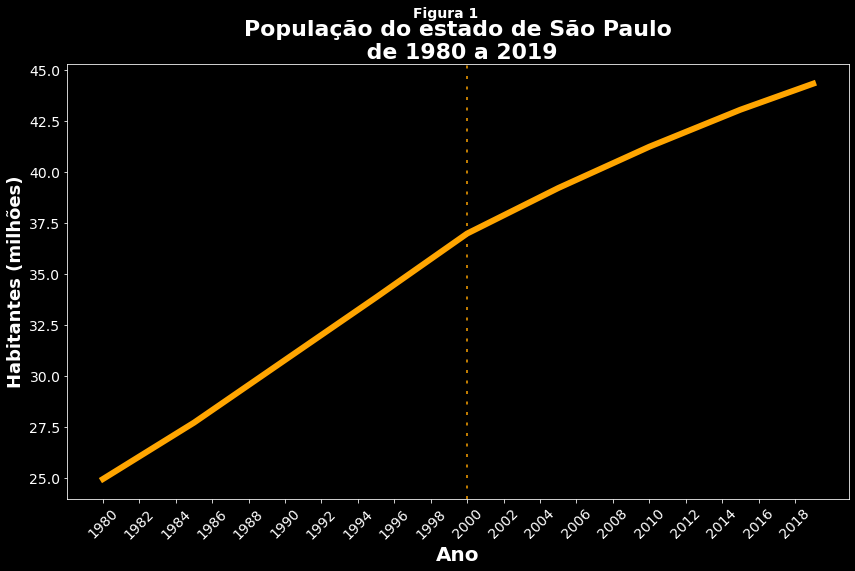

In [ ]:
# gráfico da população de todos os anos (de 1980 até 2019)
plt.figure(figsize=(14,8))
plt.style.use("dark_background")

plt.xlabel("Ano", fontsize=20, fontweight="bold")
plt.ylabel("Habitantes (milhões)", fontsize=18, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(np.arange(1980, 2020, step=2), fontsize=14, rotation=45)

sns.lineplot(x=dados2_pop.index, y="populacao", data=dados2_pop, linewidth=6, color="orange")

plt.title((f"População do estado de São Paulo\n de 1980 a 2019"), fontsize=22, fontweight="bold")
plt.suptitle("Figura 1", fontsize=14, fontweight="bold")
plt.axvline(x=2000, dashes=(2,5), color="orange");

In [ ]:
# calculando o crescimento da população (porcentagem)
max(dados2_pop.populacao) / min(dados2_pop.populacao) * 100

177.5812621993186

###**Criando datasets das populações: organizado por década (80, 90, 2000 e 2010)**


In [ ]:
# dividi o dataset da população em 4 datasets, organizados por décadas, para análises posteriores
pop_80 = dados_pop.loc[1980:1989]
pop_90 = dados_pop.loc[1990:1999]
pop_00 = dados_pop.loc[2000:2009]
pop_10 = dados_pop.loc[2010:2019]

In [ ]:
dados_pop.loc[1980]

populacao    24953238
Name: 1980, dtype: int64

In [ ]:
dados_pop.loc[2019]

populacao    44312275
Name: 2019, dtype: int64

###**COMENTÁRIOS**

- Em 1980, a população do estado de São Paulo era de 24,9 milhões de habitantes, e em 2019, de 44,2 milhões de habitantes, representando um crescimento de 77,58%. 

- É possível observar na Figura 1 que a população crescia de maneira exponencial até o ano de 2000. Nesse ano, é possível visualizar um ponto de inflexão, ou seja, o crescimento da população começou a desacelerar (crescimento logístico), tendendo a uma estabilização (platô) no número de habitantes do estado.
- É possível que essa mudança no padrão do crescimento, de exponencial para logístico a partir de 2000, seja reflexo ou do aumento do número de óbitos ou da diminuição da natalidade, ou ambas. 

##**<font color="blue">2. Análise dos óbitos do estado de SP**
Fonte: [Óbitos registrados no cartório civil desde 1970 no Brasil](https://www.kaggle.com/amandalk/registered-deaths-brazil)

In [ ]:
# lendo o arquivo dos óbitos
obitos = pd.read_csv("/content/drive/My Drive/Colab Notebooks/#Bootcamp/deaths_brazil.csv")

In [ ]:
obitos.head()

,year,month,state,deaths
0,1970,1,AM,1
1,1970,1,BA,6
2,1970,1,CE,9
3,1970,1,DF,52
4,1970,1,ES,65


In [ ]:
# verificando se há valores ausentes
obitos.isna().sum()

year      0
month     0
state     0
deaths    0
dtype: int64

###**Filtrando os óbitos pelo estado de SP**
Como o objetivo é analisar apenas a população do estado de São Paulo, temos que eliminar os dados referentes aos outros estados.

In [ ]:
# buscando os óbitos de SP e salvando numa nova variável
obitos_sp = obitos.query("state == 'SP'")

In [ ]:
obitos_sp.head()

,year,month,state,deaths
17,1970,1,SP,13433
34,1970,2,SP,11707
50,1970,3,SP,13218
68,1970,4,SP,12897
85,1970,5,SP,13467


In [ ]:
# retirado a coluna 'state' (já que todos os dados são de SP)
obitos_sp = obitos_sp.drop("state", axis = 1)


In [ ]:
obitos_sp.head(2)

,year,month,deaths
17,1970,1,13433
34,1970,2,11707


###**Mudando os valores dos meses para seus respectivos nomes**
No nosso dataset, os meses estão como números. Vamos substituí-los pelos nomes dos meses.

In [ ]:
# dicionário com os nomes dos meses
meses = {1: "Jan", 2: "Fev", 3: "Mar", 4: "Abr", 5: "Mai", 6: "Jun", 
         7: "Jul", 8: "Ago", 9: "Set", 10: "Out", 11: "Nov", 12: "Dez"}

In [ ]:
# fazendo a substituição 
obitos_sp.month = obitos_sp.month.map(meses)

In [ ]:
# verificando a substituição
obitos_sp.head()

,year,month,deaths
17,1970,Jan,13433
34,1970,Fev,11707
50,1970,Mar,13218
68,1970,Abr,12897
85,1970,Mai,13467


In [ ]:
# colocando os anos no índice
obitos_sp.set_index("year", inplace=True)

In [ ]:
# selecionando os óbitos a partir de 1980 e até 2019 (já que os dados da população começam em 1980 e terminam em 2019)
obitos_sp = obitos_sp.loc[1980:2019]


###**Agrupando os valores por ano**


In [ ]:
# agrupando os óbitos por ano e salvando numa nova variável
obitos2_sp = obitos_sp.groupby(by=["year"])["deaths"].agg("sum").reset_index()

In [ ]:
# colocando os anos como índice
obitos2_sp.set_index("year", inplace=True) 

In [ ]:
obitos2_sp.head(3)

,deaths
year,
1980,177093
1981,175525
1982,174838


In [ ]:
obitos2_sp.tail(3)

,deaths
year,
2017,299871
2018,303351
2019,312164


####<font color="purple">**FIGURA 2. Total de óbitos de 1980 até 2019 no estado de São Paulo**


In [ ]:
obitos2_sp.head(3)

,deaths
year,
1980,177093
1981,175525
1982,174838


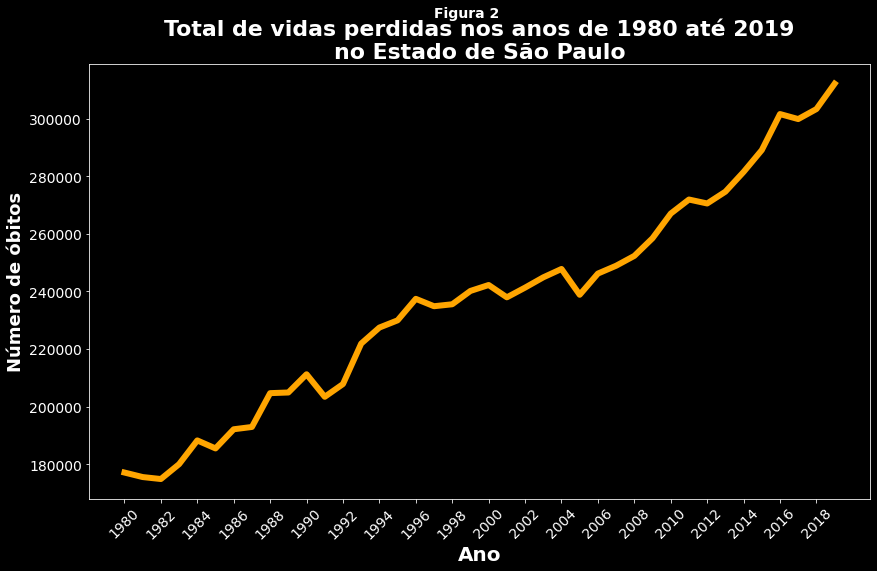

In [ ]:
# gráfico do total de óbitos de todos os anos (de 1980 até 2019)
plt.figure(figsize=(14,8))
plt.style.use("dark_background")

plt.xlabel("Ano", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(np.arange(1980, 2020, step=2), fontsize=14, rotation=45)

sns.lineplot(x=obitos2_sp.index, y="deaths", data=obitos2_sp, linewidth=6, color="orange")

plt.title((f"Total de vidas perdidas nos anos de 1980 até 2019\nno Estado de São Paulo"), 
            fontsize=22, fontweight="bold")
plt.suptitle("Figura 2", fontsize=14, fontweight="bold");

In [ ]:
# óbitos em 1980
obitos2_sp.loc[1980]

deaths    177093
Name: 1980, dtype: int64

In [ ]:
# óbitos em 2019
obitos2_sp.loc[2019]

deaths    312164
Name: 2019, dtype: int64

###**COMENTÁRIOS**
- É possível visualizar o crescimento no número absoluto de óbitos ao longo dos anos, com oscilações, sendo que em 1980 foram registrados 177.093 óbitos, enquanto que em 2019 foram 312.164 óbitos, um aumento de 76,27%.
- Vale lembrar que o aumento da população do estado nesse mesmo período foi de 77,58%, taxas de crescimento bem parecidas.



##<font color="blue">**3. Análise dos óbitos por mês, divido por décadas**
Aqui foram analisados os óbitos para cada mês de todos os anos. Cada gráfico contém os dados de uma década a fim de facilitar a visualização e evitar plotar 40 linhas em um único gráfico (representando os 40 anos de coleta de dados). O objetivo de analisar os óbitos por mês foi verificar se existe alguma tendência ou padrão na ocorrência de óbitos ao longo do ano.

###**Separando os óbitos por décadas: anos 80, 90, 2000 e 2010**
Aqui, separei os dados por décadas em quatro datasets para análises posteriores. 

In [ ]:
# Definindo as décadas de 80, 90, 2000 e 2010 e salvando em suas respectivas variáveis (para análises posteriores)
# esses datasets contêm a coluna "month"
obitos_80 = obitos_sp.loc[1980:1989]
obitos_90 = obitos_sp.loc[1990:1999]
obitos_00 = obitos_sp.loc[2000:2009]
obitos_10 = obitos_sp.loc[2010:2019]

In [ ]:
# Verificando se está tudo ok: ANOS 80 
# cada mês deve conter 10 valores, correspondentes ao período de coleta de dados de dez anos para cada mês
obitos_80.month.value_counts()


Abr    10
Dez    10
Ago    10
Jun    10
Nov    10
Fev    10
Mar    10
Jan    10
Out    10
Jul    10
Mai    10
Set    10
Name: month, dtype: int64

In [ ]:
# Verificando se está tudo ok: ANOS 90
obitos_90.month.value_counts()


Abr    10
Dez    10
Ago    10
Jun    10
Nov    10
Fev    10
Mar    10
Jan    10
Out    10
Jul    10
Mai    10
Set    10
Name: month, dtype: int64

In [ ]:
# Verificando se está tudo ok: ANOS 2000
obitos_00.month.value_counts()

Abr    10
Dez    10
Ago    10
Jun    10
Nov    10
Fev    10
Mar    10
Jan    10
Out    10
Jul    10
Mai    10
Set    10
Name: month, dtype: int64

In [ ]:
# Verificando se está tudo ok: ANOS 2010
obitos_10.month.value_counts()

Abr    10
Dez    10
Ago    10
Jun    10
Nov    10
Fev    10
Mar    10
Jan    10
Out    10
Jul    10
Mai    10
Set    10
Name: month, dtype: int64

####**<font color="purple">FIGURA 3. Óbitos da década de 1980**



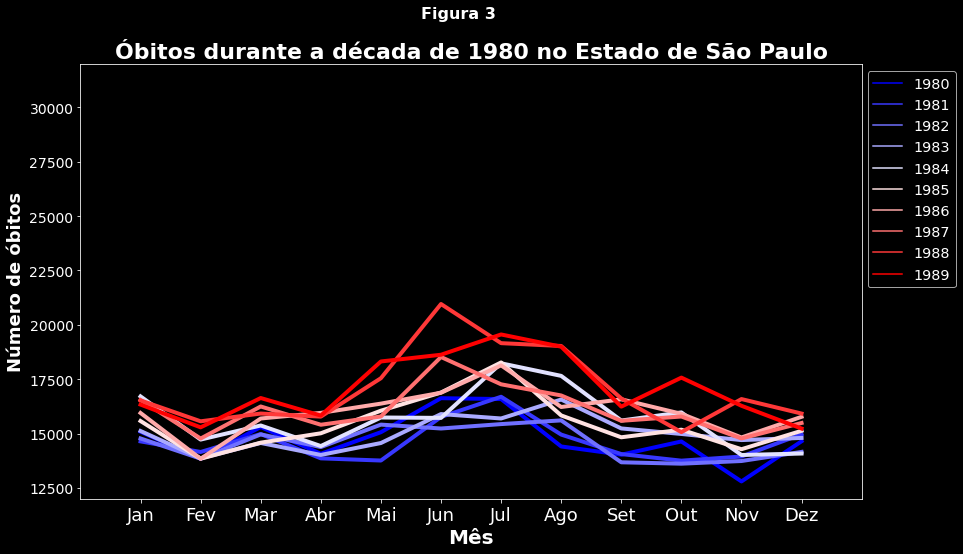

In [ ]:
# gráfico dos óbitos dos meses dos anos 80
plt.figure(figsize=(14,8))
plt.style.use("dark_background")

plt.xlabel("Mês", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
  
sns.lineplot(x="month", y="deaths", hue="year", data=obitos_80, linewidth=4, palette="bwr", legend="full")

plt.legend(fontsize="x-large", frameon=True, bbox_to_anchor=(1.13,1))

plt.title((f"Óbitos durante a década de 1980 no Estado de São Paulo"), fontsize=22, fontweight="bold")
plt.suptitle("Figura 3", fontsize=16, fontweight="bold")

plt.xlim(-1,12)
plt.ylim(12000,32000);


####**<font color="purple">FIGURA 4. Óbitos da década de 1990**



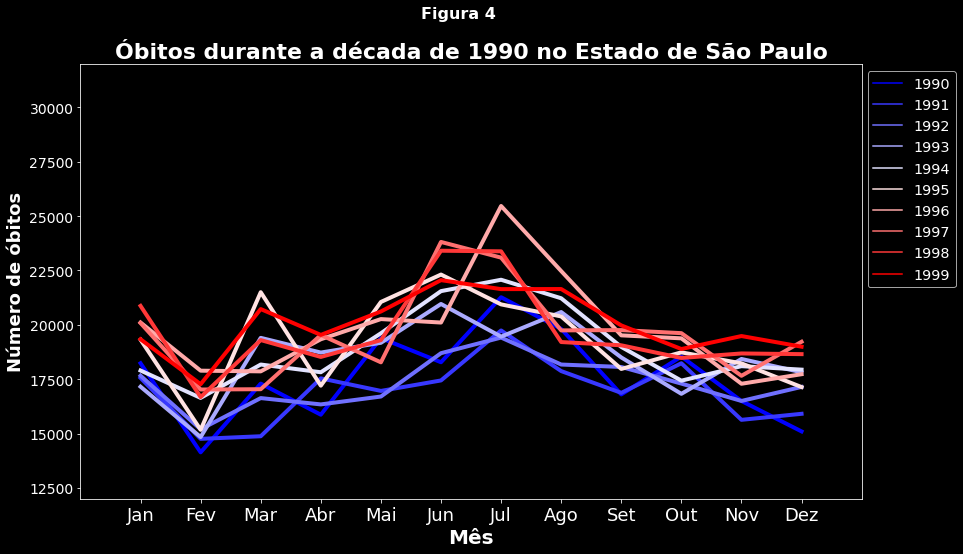

In [ ]:
# gráfico dos óbitos no meses dos anos 90
plt.figure(figsize=(14,8))
plt.style.use("dark_background")

plt.xlabel("Mês", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
  
sns.lineplot(x="month", y="deaths", hue="year", data=obitos_90, linewidth=4, palette="bwr", legend="full")

plt.legend( fontsize="x-large", frameon=True, bbox_to_anchor=(1.13,1))

plt.title((f"Óbitos durante a década de 1990 no Estado de São Paulo"), 
            fontsize=22, fontweight="bold")
plt.suptitle("Figura 4", fontsize=16, fontweight="bold")

plt.xlim(-1,12)
plt.ylim(12000,32000);

####**<font color="purple">FIGURA 5. Óbitos da década de 2000**



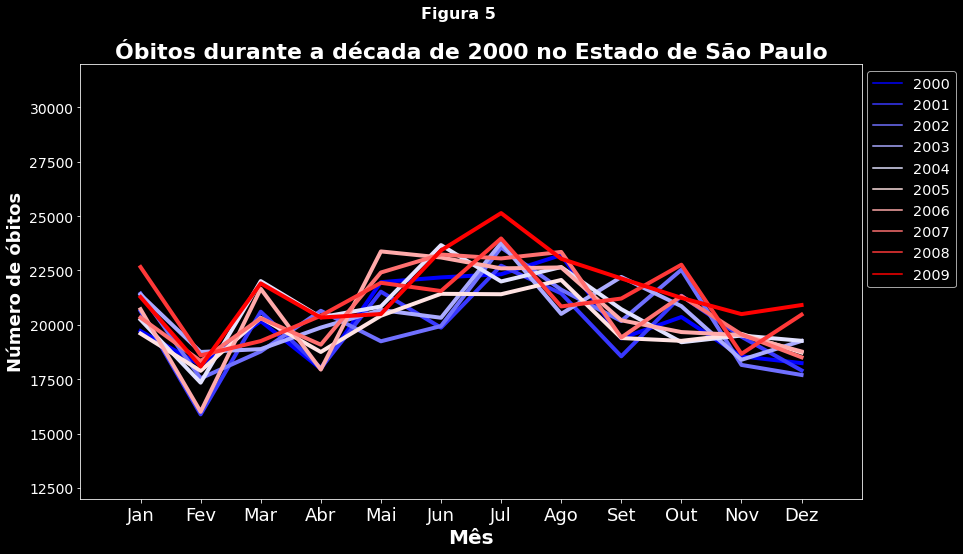

In [ ]:
# gráfico dos óbitos dos anos 2000
plt.figure(figsize=(14,8))
plt.style.use("dark_background")

plt.xlabel("Mês", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
  
sns.lineplot(x="month", y="deaths", hue="year", data=obitos_00, linewidth=4, palette="bwr", legend="full")

plt.legend( fontsize="x-large", frameon=True, bbox_to_anchor=(1.13,1))

plt.title((f"Óbitos durante a década de 2000 no Estado de São Paulo"), 
            fontsize=22, fontweight="bold")
plt.suptitle("Figura 5", fontsize=16, fontweight="bold")

plt.xlim(-1,12)
plt.ylim(12000,32000);

####**<font color="purple">FIGURA 6. Óbitos da década de 2010**



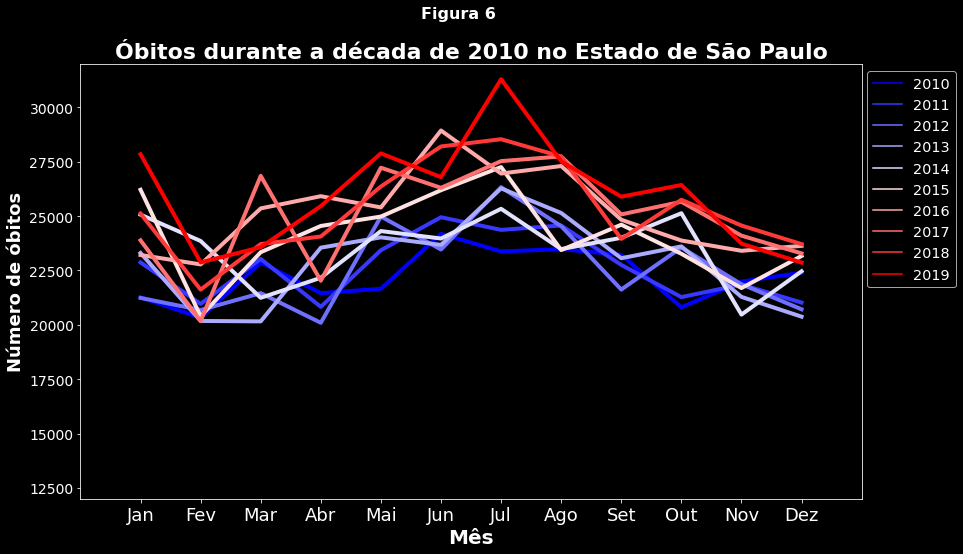

In [ ]:
# gráfico dos óbitos dos anos 2010
plt.figure(figsize=(14,8))
plt.style.use("dark_background")

plt.xlabel("Mês", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
  
sns.lineplot(x="month", y="deaths", hue="year", data=obitos_10, linewidth=4, palette="bwr", legend="full")

plt.legend( fontsize="x-large", frameon=True, bbox_to_anchor=(1.13,1))

plt.title((f"Óbitos durante a década de 2010 no Estado de São Paulo"), 
            fontsize=22, fontweight="bold")
plt.suptitle("Figura 6", fontsize=16, fontweight="bold")

plt.xlim(-1,12)
plt.ylim(12000,32000);

###**COMENTÁRIOS**
- Analisando as figuras de 3 a 6, é possível verificar que todos os anos iniciam-se com um maior número de óbitos em janeiro, seguido de uma queda em fevereiro, e então os valores oscilam de maneira regular ao longo dos meses. Esses maiores valores presentes no mês de janeiro podem ser a continuidade do número de mortes em dezembro do ano anterior, visto que o número de óbitos aumenta com o passar dos anos (Figura 2).
- É possível observar que todos os anos apresentam uma tendência de aumento no número dos óbitos quando se aproxima do meio do ano, entre os meses de maio e julho, formando um "pico" na região central do gráfico (será então que devemos olhar 4x antes de atravessar a rua nesse período? Eu irei).
- É possível perceber que conforme as décadas vão passando, as linhas dos gráficos vão se deslocando e se concentrando na região superior do gráfico, indicando o aumento absoluto no número de óbitos.

##<font color="blue">**4. Correlação entre óbitos e tamanho populacional**
Correlação irá indicar se há alguma associação entre as variáveis (número de óbitos x número de habitantes).

####**<font color="Purple">FIGURA 7. Correlação entre óbitos e tamanho da população: de 1980 até 2019**

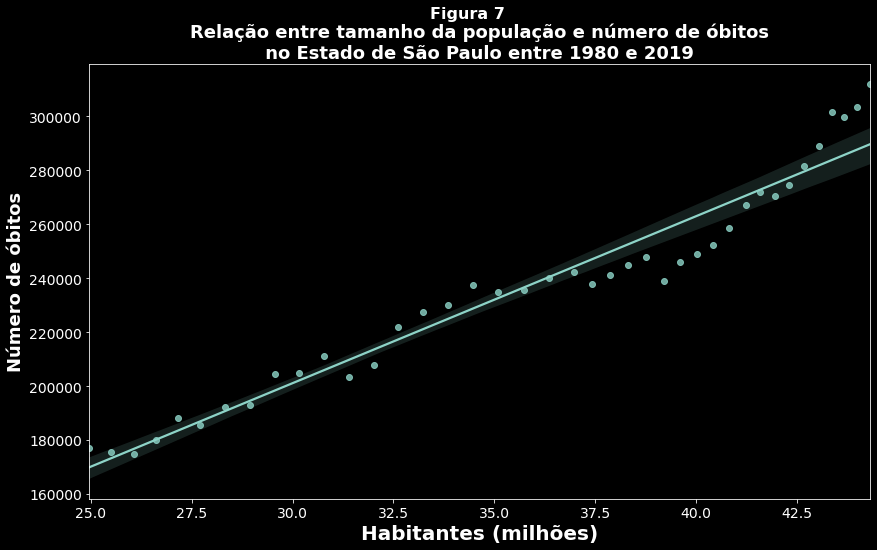

In [ ]:
# correlação entre tamanho da população e óbitos
plt.figure(figsize=(14,8))
plt.style.use("dark_background")

sns.regplot(x=dados2_pop.populacao, y=obitos2_sp.deaths)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.xlabel("Habitantes (milhões)", fontsize=20, fontweight="bold")
plt.ylabel("Número de óbitos", fontsize=18, fontweight="bold")

plt.title((f"Relação entre tamanho da população e número de óbitos\n no Estado de São Paulo entre 1980 e 2019 "), 
            fontsize=18, fontweight="bold")
plt.suptitle("Figura 7", fontsize=16, fontweight="bold");

In [ ]:
# correlação entre tamanho populacional e óbitos
dados2_pop["populacao"].corr(obitos2_sp["deaths"])

0.9726962401712331

###**COMENTÁRIOS**
- É possível verificar uma forte correlação entre o número de óbitos e o tamanho populacional, com um valor de 0,97. Isso mostra uma forte associação estatística entre essas duas variáveis, porém não significa, necessariamente, relação de causa e efeito.


##<font color="blue">**5. Análise dos nascidos vivos no estado de SP**
Fonte: [DataSUS](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinasc/cnv/nvsp.def)

In [ ]:
# lendo o arquivo
dados_vivos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/#Bootcamp/nascidos_vivos.csv", sep=";",
                          skiprows=4, skipfooter=13, usecols=["Total", "Ano do nascimento"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dados_vivos.head()

,Ano do nascimento,Total
0,1994,689577
1,1995,691370
2,1996,699013
3,1997,701947
4,1998,693413


In [ ]:
# colocar o ano do nascimento como índice 
dados_vivos.set_index("Ano do nascimento", inplace=True)

In [ ]:
dados_vivos.head(3)

,Total
Ano do nascimento,
1994,689577
1995,691370
1996,699013


In [ ]:
# o menor ano é 1994 e o maior é 2018
dados_vivos.index

Int64Index([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018],
           dtype='int64', name='Ano do nascimento')

####**<font color="Purple">FIGURA 8. Número de nascidos vivos de 1994 a 2018**

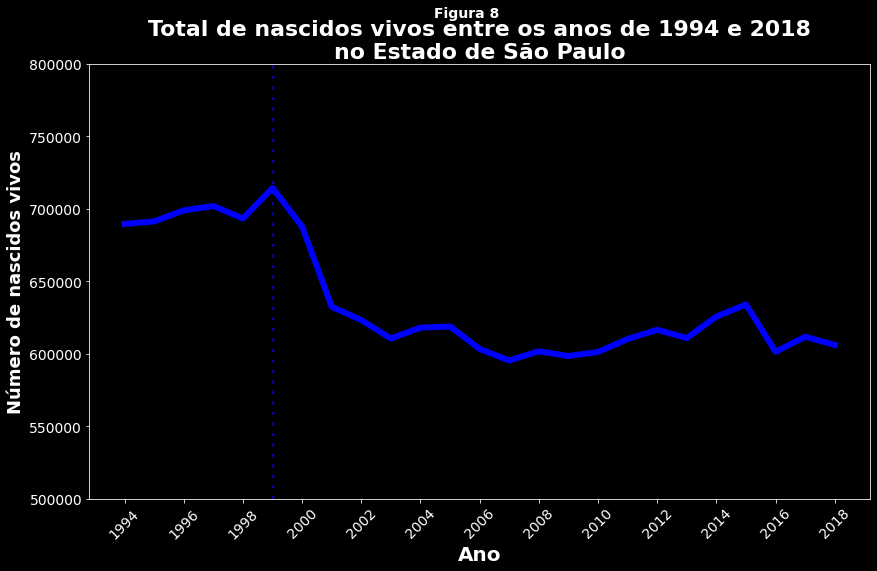

In [ ]:
# gráfico do total de nascidos vivos de todos os anos (de 1994 até 2018)
plt.figure(figsize=(14,8))
plt.style.use("dark_background")

plt.xlabel("Ano", fontsize=20, fontweight="bold")
plt.ylabel("Número de nascidos vivos", fontsize=18, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(np.arange(1994, 2020, step=2), fontsize=14, rotation=45)

plt.ylim(500000, 800000)

sns.lineplot(x=dados_vivos.index, y="Total", data=dados_vivos, linewidth=6, color="blue")

plt.title((f"Total de nascidos vivos entre os anos de 1994 e 2018\nno Estado de São Paulo"), 
            fontsize=22, fontweight="bold")
plt.suptitle("Figura 8", fontsize=14, fontweight="bold")
plt.axvline(x=1999, color="blue", dashes=(2,5));

In [ ]:
dados_vivos.loc[1994]

Total    689577
Name: 1994, dtype: int64

In [ ]:
dados_vivos.loc[2018]

Total    606146
Name: 2018, dtype: int64

In [ ]:
dados_vivos.loc[1999]

Total    714428
Name: 1999, dtype: int64

In [ ]:
dados_vivos.loc[2001]

Total    632483
Name: 2001, dtype: int64

###**COMENTÁRIOS**
- O número de nascidos vivos em 2018 sofreu uma queda de 12% em relação ao ano de 1994.
- É possível verificar uma queda brusca no número de nascidos vivos a partir de 1999 e, desde então, não houve recuperação nos números até o ano de 2018, ficando o número de nascidos vivos relativamente estável. 
- No ano de 1999, foram registrado 714.428 nascidos vivos, enquanto que em 2001, esse numero caiu para 632.483 nascidos vivos, uma diminuição de 11,47%.

##<font color="blue">**6. Correlação entre nascidos vivos e população**
Verificar se há dependência entre as variávies (número de nascidos vivos x número de habitantes)

In [ ]:
# selecionando o tamanho da população entre os anos de 1994 e 2018, visto que os dados de nascidos vivos então nesse período
dados3_pop = dados2_pop.loc[1994:2018]

In [ ]:
dados3_pop.tail(3)

,populacao
2016,43.354927
2017,43.674043
2018,43.993159


In [ ]:
dados3_pop.head(3)

,populacao
1994,33.235220
1995,33.848251
1996,34.473476


####**<font color="Purple">FIGURA 9. Correlação entre nascidos vivos e tamanho da população: de 1994 até 2018**

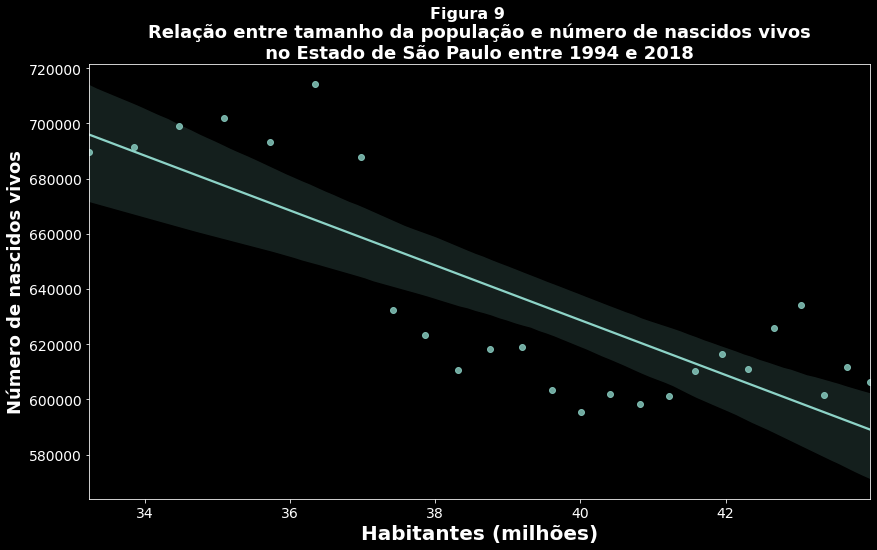

In [ ]:
# correlação entre nascidos vivos e tamanho da população 
plt.figure(figsize=(14,8))
plt.style.use("dark_background")

sns.regplot(x=dados3_pop.populacao, y=dados_vivos.Total)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.xlabel("Habitantes (milhões)", fontsize=20, fontweight="bold")
plt.ylabel("Número de nascidos vivos", fontsize=18, fontweight="bold")

plt.title((f"Relação entre tamanho da população e número de nascidos vivos\n no Estado de São Paulo entre 1994 e 2018 "), 
            fontsize=18, fontweight="bold")
plt.suptitle("Figura 9", fontsize=16, fontweight="bold");

In [ ]:
# correlação entre o tamanho populacional e nascidos vivos
dados3_pop["populacao"].corr(dados_vivos["Total"])

-0.8037150685191713

In [ ]:
# selecionando a população e nascidos vivos até 1999
pop_ate_99 = dados3_pop.loc[:1999]
nascidos_ate_99 = dados_vivos.loc[:1999]



In [ ]:
# vendo a correlação do número de nascidos vivos até 1999
pop_ate_99["populacao"].corr(nascidos_ate_99["Total"])

0.7759358234901517

In [ ]:
# selecionando a população e nascidos vivos a partir de 2000
pop_apos_00 = dados3_pop.loc[2000:]
nascidos_apos_00 = dados_vivos.loc[2000:]

In [ ]:
# vendo a correlação do número de nascidos vivos a partir de 2000
pop_apos_00["populacao"].corr(nascidos_apos_00["Total"])

-0.42854563338014456

###**COMENTÁRIOS**
- Também existe uma relação forte entre o número de habitantes e o de nascidos vivos a partir de 1994, com valor de correlação de -0.80, significando que as variáveis estão associadas de maneira inversa, ou seja, se uma variável aumenta, podemos predizer que a outra diminui. Isso não significa uma relação de causa e efeito, apenas que ambas variáveis estão associadas estatisticamente. 
- Entretanto, essa forte correlação negativa entre o número de nascidos vivos e a tamanho populacional pode não ser tão forte assim na realidade devido à dispersão de alguns pontos ao redor da reta. Ao analisarmos a correlação de nascidos vivos e população antes de 1999, vemos que essa correlação era positiva e forte, com valor de 0.77, ou seja, o número de nascimentos também aumentava com o aumento da população. E ao analisarmos a correlação a partir do ano 2000, esse valor passa a ser -0,42, uma correlação fraca, porém negativa, indicando que a partir desse período, a relação entre as variáveis se inverteu.
- Então podemos dizer que a partir do ano 2000 houve uma mudança no tipo de correlação entre essas duas variáveis.


##<font color="blue">**7. Taxa de mortalidade**

Trabalhar com taxas nos permite fazer comparações. A taxa de mortalidade é a quantidade de óbitos a cada mil habitantes. Fixando o valor do divisor em 1.000, a fim de eliminar o viés do tamanho populacional, podemos comparar os quocientes e ter uma perspectiva melhor da variação dos dados. Os valores absolutos têm sua importância, uma vez que nos mostram a contagem real de óbitos (afinal cada número é uma pessoa que perdeu a vida), porém nos dificulta em fazer comparações.

De posse dos valores referentes à quantidade de óbitos e ao tamanho da população, foi posssível calcular a taxa de mortalidade, que é o número de óbitos a cada mil habitantes. Foi calculada a taxa de mortalidade anual, desde 1980 até 2019.

Exemplo:
- Ano de 1980: 24.953.238 habitantes e 177.093 óbitos
      Taxa de mortalidade = (óbitos * 1000) / população
      Taxa de mortalidade = (177093 * 1000) / 24953238
      Taxa de mortalidade = 7,09 óbitos a cada mil habitantes

In [ ]:
# taxa de mortalidade
dados_pop.head()

,populacao
1980,24953238
1981,25505651
1982,26058064
1983,26610477
1984,27162890


In [ ]:
obitos2_sp.head()

,deaths
year,
1980,177093
1981,175525
1982,174838
1983,180005
1984,188245


In [ ]:
# criado um dataset com a população e os óbitos
taxa_mortalidade = pd.concat([obitos2_sp.deaths, dados_pop.populacao], axis=1)

In [ ]:
taxa_mortalidade.head(3)

,deaths,populacao
1980,177093,24953238
1981,175525,25505651
1982,174838,26058064


In [ ]:
# criando uma coluna com a taxa de mortalidade = (óbitos * 1000) / população
taxa_mortalidade["tx_mortalidade"] = (taxa_mortalidade.deaths * 1000) / taxa_mortalidade.populacao

In [ ]:
taxa_mortalidade.head()

,deaths,populacao,tx_mortalidade
1980,177093,24953238,7.096995
1981,175525,25505651,6.881808
1982,174838,26058064,6.709554
1983,180005,26610477,6.764441
1984,188245,27162890,6.930227


####**<font color="Purple">FIGURA 10. Taxa de mortalidade: de 1980 até 2019**

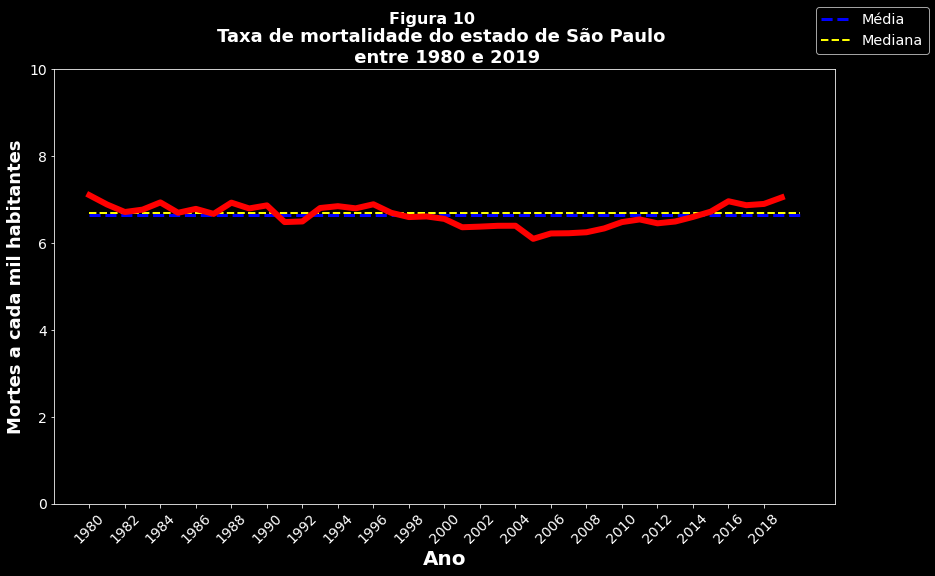

In [ ]:
# gráfico da taxa de mortalidade de todos os anos (de 1980 até 2019)
plt.figure(figsize=(14,8))
plt.style.use("dark_background")

media = taxa_mortalidade.tx_mortalidade.mean()
mediana = taxa_mortalidade.tx_mortalidade.median()

linha_media = plt.hlines(y=media, xmin=1980, xmax=2020, color="blue", linestyles="dashed", linewidth=3)
linha_mediana = plt.hlines(y=mediana, xmin=1980, xmax=2020, color="yellow", linestyles="dashed", linewidth=2)
plt.figlegend((linha_media, linha_mediana),('Média', 'Mediana'), fontsize="x-large")

plt.xlabel("Ano", fontsize=20, fontweight="bold")
plt.ylabel("Mortes a cada mil habitantes", fontsize=18, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(np.arange(1980, 2020, step=2), fontsize=14, rotation=45)

plt.ylim(0,10)

sns.lineplot(x=taxa_mortalidade.index, y="tx_mortalidade", data=taxa_mortalidade, 
               linewidth=6, color="red", legend="full")

plt.title((f"Taxa de mortalidade do estado de São Paulo \n entre 1980 e 2019"), fontsize=18, fontweight="bold")
plt.suptitle("Figura 10", fontsize=16, fontweight="bold");

In [ ]:
# mediana da taxa de mortalidade 
taxa_mortalidade.tx_mortalidade.median()

6.678674811615005

In [ ]:
taxa_mortalidade.tx_mortalidade.describe()

count    40.000000
mean      6.637600
std       0.249245
min       6.092801
25%       6.470837
50%       6.678675
75%       6.848287
max       7.096995
Name: tx_mortalidade, dtype: float64

###**COMENTÁRIOS**
- Quando analisamos o número absoluto de óbitos, vimos que o valor aumentou ao longo dos anos, nos dando a impressão de que mais pessoas estavam morrendo. Isso é verdade, mas quando colocamos esses números em relação ao tamanho da população, vimos que o número de óbitos se manteve praticamente constante ao longo desses 40 anos.
- A taxa de mortalidade média foi de 6.63 ± 0,24 e a amplitude dos dados foi relativamente baixa, sendo a maior taxa de mortalidade igual a 7,09 e a menor igual a 6,09. A mediana também foi semelhante à media, com valor de 6,67, mostrando que as taxa de mortalidade estão simétricas. Além disso, o desvio padrão também foi baixo (0,24, menor do que 5% da média), mostrando que os dados estão poucos dispersos, ou seja, estão concentrados ao redor da média.

##<font color="blue">**8. Taxa de natalidade**

Taxa de natalidade é o número de nascidos vivos a cada mil habitantes. Foi calculada a taxa de natalidade anual, desde 1994 até 2018.

Exemplo:
- Ano de 1994: 33.235.220 habitantes e 689.577 nascidos vivos
      Taxa de natalidade = (nascidos vivos * 1000) / população
      Taxa de natalidade = (689577 * 1000) / 33235220
      Taxa de natalidade = 20,7 nascidos vivos a cada mil habitantes

In [ ]:
dados3_pop.head()

,populacao
1994,33.235220
1995,33.848251
1996,34.473476
1997,35.098701
1998,35.723926


In [ ]:
dados_vivos.head()

,Total
Ano do nascimento,
1994,689577
1995,691370
1996,699013
1997,701947
1998,693413


In [ ]:
# criado um dataset com a população e os nascidos vivos
taxa_natalidade = pd.concat([dados_vivos.Total, (dados3_pop.populacao)*(10**6)], axis=1)

In [ ]:
taxa_natalidade.head()

,Total,populacao
1994,689577,33235220.0
1995,691370,33848251.0
1996,699013,34473476.0
1997,701947,35098701.0
1998,693413,35723926.0


In [ ]:
# criando uma coluna com a taxa de natalidade = (nascidos vivos * 1000) / população
taxa_natalidade["tx_natalidade"] = (taxa_natalidade.Total * 1000) / taxa_natalidade.populacao

In [ ]:
taxa_natalidade.head()

,Total,populacao,tx_natalidade
1994,689577,33235220.0,20.748381
1995,691370,33848251.0,20.425575
1996,699013,34473476.0,20.276835
1997,701947,35098701.0,19.999230
1998,693413,35723926.0,19.410325


In [ ]:
taxa_natalidade.tail()

,Total,populacao,tx_natalidade
2014,625687,42673386.0,14.662230
2015,634026,43035811.0,14.732521
2016,601437,43354927.0,13.872403
2017,611803,43674043.0,14.008389
2018,606146,43993159.0,13.778188


####**<font color="Purple">Figura 11. Taxa de natalidade: de 1994 até 2018**

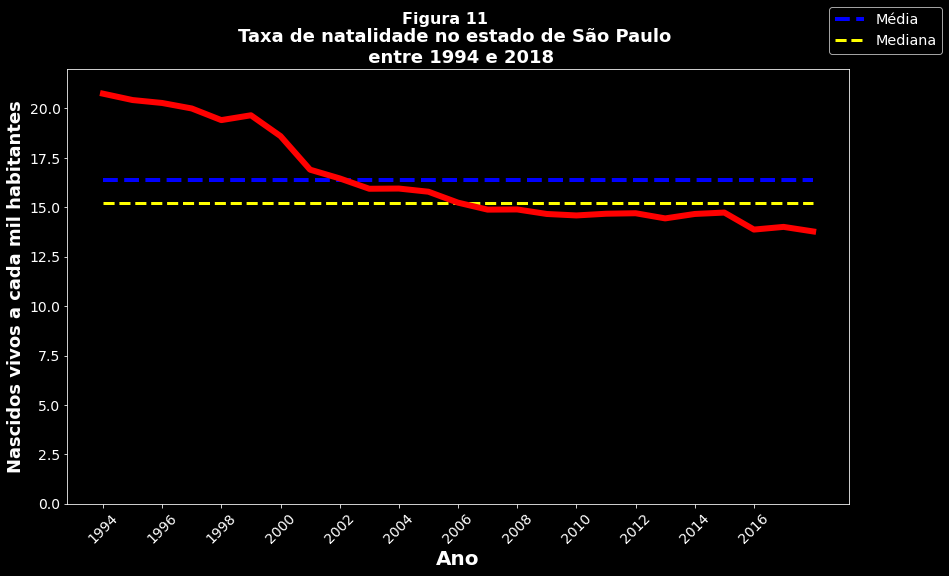

In [ ]:
# gráfico da taxa de natalidade de todos os anos (de 1994 até 2018)
plt.figure(figsize=(14,8))
plt.style.use("dark_background")

media = taxa_natalidade.tx_natalidade.mean()
mediana = taxa_natalidade.tx_natalidade.median()

linha_media = plt.hlines(y=media, xmin=1994, xmax=2018, color="blue", linestyles="dashed", linewidth=4)
linha_mediana = plt.hlines(y=mediana, xmin=1994, xmax=2018, color="yellow", linestyles="dashed", linewidth=3)
plt.figlegend((linha_media, linha_mediana),('Média', 'Mediana'), fontsize="x-large")

plt.xlabel("Ano", fontsize=20, fontweight="bold")
plt.ylabel("Nascidos vivos a cada mil habitantes", fontsize=18, fontweight="bold")

plt.yticks(fontsize=14)
plt.xticks(np.arange(1994, 2018, step=2), fontsize=14, rotation=45)

plt.ylim(0, 22)

sns.lineplot(x=taxa_natalidade.index, y="tx_natalidade", data=taxa_natalidade, linewidth=6, color="red")

plt.title((f"Taxa de natalidade no estado de São Paulo \n entre 1994 e 2018"), fontsize=18, fontweight="bold")
plt.suptitle("Figura 11", fontsize=16, fontweight="bold");

In [ ]:
taxa_natalidade.tx_natalidade.median()

15.234380907849099

In [ ]:
taxa_natalidade.tx_natalidade.describe()

count    25.000000
mean     16.370902
std       2.375069
min      13.778188
25%      14.662230
50%      15.234381
75%      18.601503
max      20.748381
Name: tx_natalidade, dtype: float64

###**COMENTÁRIOS**
- A taxa de natalidade média foi de 16,37 ± 2,37, e a amplitute relativamente alta, com o valor mínimo igual a 13,77 e o valor máximo igual a 20,74. A mediana foi igual a 15,23.
-Diferente da taxa de mortalidade, vemos que a taxa de natalidade tem uma maior variação, uma vez que o valor do desvio padrão representa 14,47% da média, ou seja, os valores estão mais dispersos ao redos da média. Além disso, as taxas de natalidade mais altas estão puxando a média para cima, deixando uma distribuição assimétrica dos valores.

#**ALGUMAS CONCLUSÕES**
---


##<font color="green">**Envelhecimento da população**
A diminuição da taxa de natalidade já é uma realidade em muitos países e isso reflete um aumento da população idosa. Esse envelhecimento pode ter um impacto na economia de um país, como por exemplo o Japão, onde há falta de mão-de-obra e crise no sistema de previdência social.

Mas o ponto interessante é: por que a natalidade no Brasil começou a diminuir a partir de 1999? Seria por causa de maior uso e disponibilidade de métodos contraceptivos? Ou maior introdução das mulheres no mercado de trabalho? Mulheres priorizando suas carreiras ou carreiras prejudicando as mulheres de terem filhos? 


Como a taxa de mortalidade se manteve praticamente estável ao longo desses anos, provavelmente o maior impacto na desaceleração do crescimento da população a partir dos anos 2000 no estado de São Paulo vem da diminuição da taxa de natalidade. Com o aumento do envelhecimento da população, várias consequências e exigências virão, como a necessidade de ampliação e inovação nos serviços para a população idosa (saúde, bancário, tecnológico, educação, lazer, infraestrutura, mobilidade), reformas na previdência social, políticas públicas e privadas que promovam a reintrodução ou maior permanência dessa população no mercado de trabalho, surgimento de novos nichos que atendam às necessidades desse público.

No gráfico abaixo, é possível visualizar o comportamento das retas dos nascidos vivos e do número de habitantes, mostrando que após a queda no número de nascidos vivos em 1999, houve uma desaceleração no crescimento da população a partir de 2000. Vale ressaltar que apenas a queda da natalidade em si não explica por completo a redução no crescimento da população. Há outros fatores, como migração, planejamento familiar e fecundidade.

O fato é que a redução da taxa de natalidade poderá ser uma das responsáveis pelo controle populacional até que encontremos alternativas para garantir um desenvolvimento sustentável em que atendemos às necessidades da geração atual sem comprometer as futuras.

####**<font color="Purple">FIGURA 12. Taxa de natalidade x Crescimento populacional: de 1994 até 2018**

In [ ]:
# criando um dataset com a população e os nascidos vivos
pop_vivos = pd.concat([dados_pop[["populacao"]], dados_vivos[["Total"]]], axis = 1)

In [ ]:
# filtrando os valores a partir de 1994 até 2018 (já que as informações sobre nascidos vivos nos impõe essa limitação)
pop_vivos = pop_vivos.loc[1994:2018]

In [ ]:
pop_vivos.head()

,populacao,Total
1994,33235220,689577.0
1995,33848251,691370.0
1996,34473476,699013.0
1997,35098701,701947.0
1998,35723926,693413.0


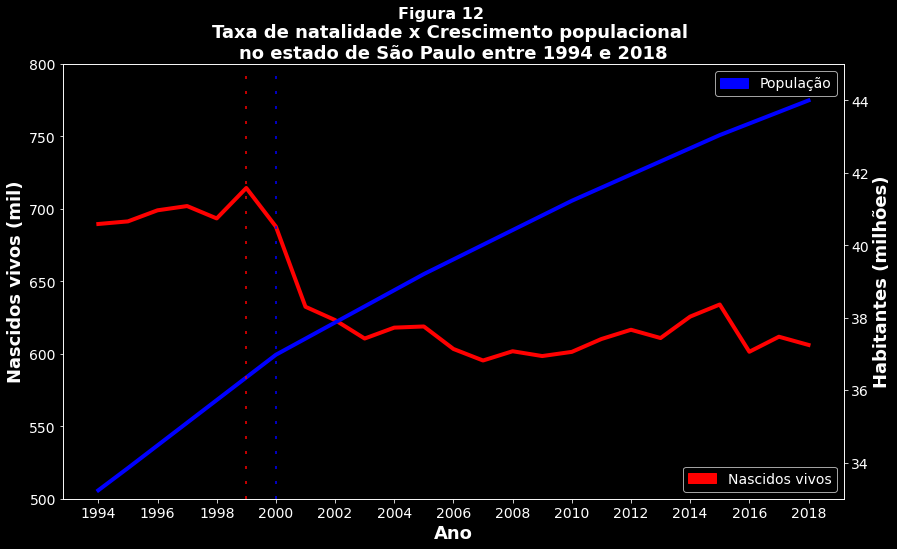

In [ ]:
# gráfico da relação entre população e nascidos vivos
plt.figure(figsize=(14,8))

linha1 = sns.lineplot(data=pop_vivos["Total"]/1000, color="red", linewidth=4, )
plt.ylim(500, 800)
plt.ylabel("Nascidos vivos (mil)", fontsize=18, fontweight="bold")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax2 = plt.twinx()

linha2 = sns.lineplot(data=pop_vivos["populacao"]/10**6, ax=ax2, linewidth=4, color="blue")
plt.ylabel("Habitantes (milhões)", fontsize=18, fontweight="bold")
plt.ylim(33, 45)
plt.yticks(fontsize=14)
plt.xticks(np.arange(1994, 2020, step=2), fontsize=14)

linha_azul = mpatches.Patch(color='blue', label='População')
linha_vermelha = mpatches.Patch(color='red', label='Nascidos vivos')
legenda_azul = plt.legend(handles=[linha_azul], loc="upper right", fontsize=14)
plt.gca().add_artist(legenda_azul)
plt.legend(handles=[linha_vermelha], loc="lower right", fontsize=14)

plt.title((f"Taxa de natalidade x Crescimento populacional \nno estado de São Paulo entre 1994 e 2018"), fontsize=18, fontweight="bold")
plt.suptitle("Figura 12", fontsize=16, fontweight="bold")
linha1.set_xlabel("Ano", fontsize=18, fontweight="bold")

plt.axvline(x=1999, dashes=(2,8), color="red")
plt.axvline(x=2000, dashes=(2,8), color="blue");


##<font color="green">**Mortalidade continua a mesma**
Na análise dos dados sobre os óbitos, eu esperava encontrar uma redução na taxa de mortalidade com o passar do tempo, visto que os avanços na medicina, oferta de serviços públicos de saúde, melhorias no saneamento básico e acesso à informação levariam a uma maior expectativa de vida e redução das mortes (tanto por causas naturais quanto externas) ao longo das gerações. O Brasil ocupa a 129ª posição em relação à taxa de mortalidade, segundo o [The World Factbook](https://www.cia.gov/library/publications/the-world-factbook/fields/346rank.html), com uma taxa de mortalidade igual a 6,9, enquanto que o primeiro colocado é Lesoto, com 15,4 óbitos a cada mil habitantes, e o último colocado é o Qatar, com 1,6 óbitos a cada mil habitantes. 

Se em 40 anos não fomos capazes de melhorar esse índice, talvez seja um indício de que a eficiência na implementação das políticas públicas e sua fiscalização precisam ser repensadas.